In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))

In [2]:
airbnb_df = pd.read_csv(r"C:\Users\darre\OneDrive\Documents\Capstone One Clean\Airbnb_NYC_Original.csv")
airbnb_df.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
0,1.0,188,11,0.0,1.0,7,225.0,1,1,0,2,365,13
1,4.0,48,11,1.0,1.0,1,89.0,19,3,0,1,137,9
2,1.0,188,11,1.0,1.0,3,200.0,1,2,0,2,0,13
3,1.0,188,11,1.0,1.0,2,79.0,1,2,2,2,216,13
4,1.0,188,11,1.0,1.0,2,79.0,1,1,2,2,0,16


In [3]:
#shuffle rows and create training and testing sets
airbnb_df_shuffled = shuffle(airbnb_df)

airbnb_df_shuffled.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
26045,3.0,188,11,3.0,1.0,30,240.0,1,6,0,2,155,13
41411,3.0,48,11,1.0,2.0,30,29.0,23,3,3,1,365,9
41424,2.0,48,11,1.0,1.0,5,130.0,1,3,0,1,86,9
19657,3.0,225,11,2.0,1.0,7,200.0,1,5,0,3,0,13
26487,1.0,48,11,1.0,1.0,2,100.0,1,2,0,1,0,9


In [4]:
y = airbnb_df_shuffled['price']
X = airbnb_df_shuffled.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)

In [5]:
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
model.score(X_test, y_test)

0.07062658457080769

In [7]:
my_pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

my_pipeline_RF.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=

In [8]:
evaluate_model(my_pipeline_RF, X_test, y_test)

Median Absolute Error: 27.38
RMSE: 86.97


In [9]:
evaluate_model(my_pipeline_RF, X_train, y_train)

Median Absolute Error: 13.3
RMSE: 48.39


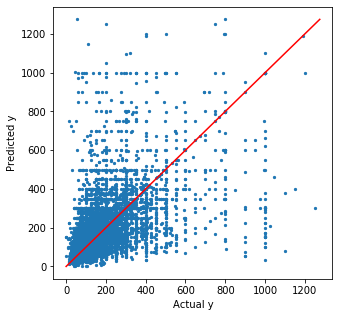

In [10]:
y_pred = model.predict(X_test)

# Build a plot
plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test, s = 5)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')


# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [12]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
8,room_type,0.220327
4,bathrooms,0.166182
10,availability_365,0.152590
11,latitude_longitude_bin,0.083555
7,accommodates,0.079787
5,minimum_nights,0.077462
6,property_type,0.060223
3,bedrooms,0.047477
0,beds,0.043128
1,city,0.042941


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('price ~ accommodates + bathrooms + bedrooms', airbnb_df_shuffled).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     6219.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:16:02   Log-Likelihood:            -3.0521e+05
No. Observations:               50200   AIC:                         6.104e+05
Df Residuals:                   50196   BIC:                         6.105e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.5981      1.441      5.273   